<a href="https://colab.research.google.com/github/gunawanbinus/economic-status-classification-knn/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

KNN MODEL EVALUATION RESULTS

1. Overall KNN Model Accuracy: 75.48%

2. Classification Report:
              precision    recall  f1-score   support

        Kaya       0.72      0.72      0.72        32
    Menengah       0.77      0.75      0.76        79
      Miskin       0.76      0.80      0.78        44

    accuracy                           0.75       155
   macro avg       0.75      0.75      0.75       155
weighted avg       0.75      0.75      0.75       155


3. Confusion Matrix:
[[23  9  0]
 [ 9 59 11]
 [ 0  9 35]]

4. Cross-Validation Accuracy Scores: [0.72815534 0.67961165 0.85436893 0.75728155 0.79411765]
   Mean Cross-Validation Accuracy: 76.27070245573957

5. Generating Status Accuracy Pie Chart...


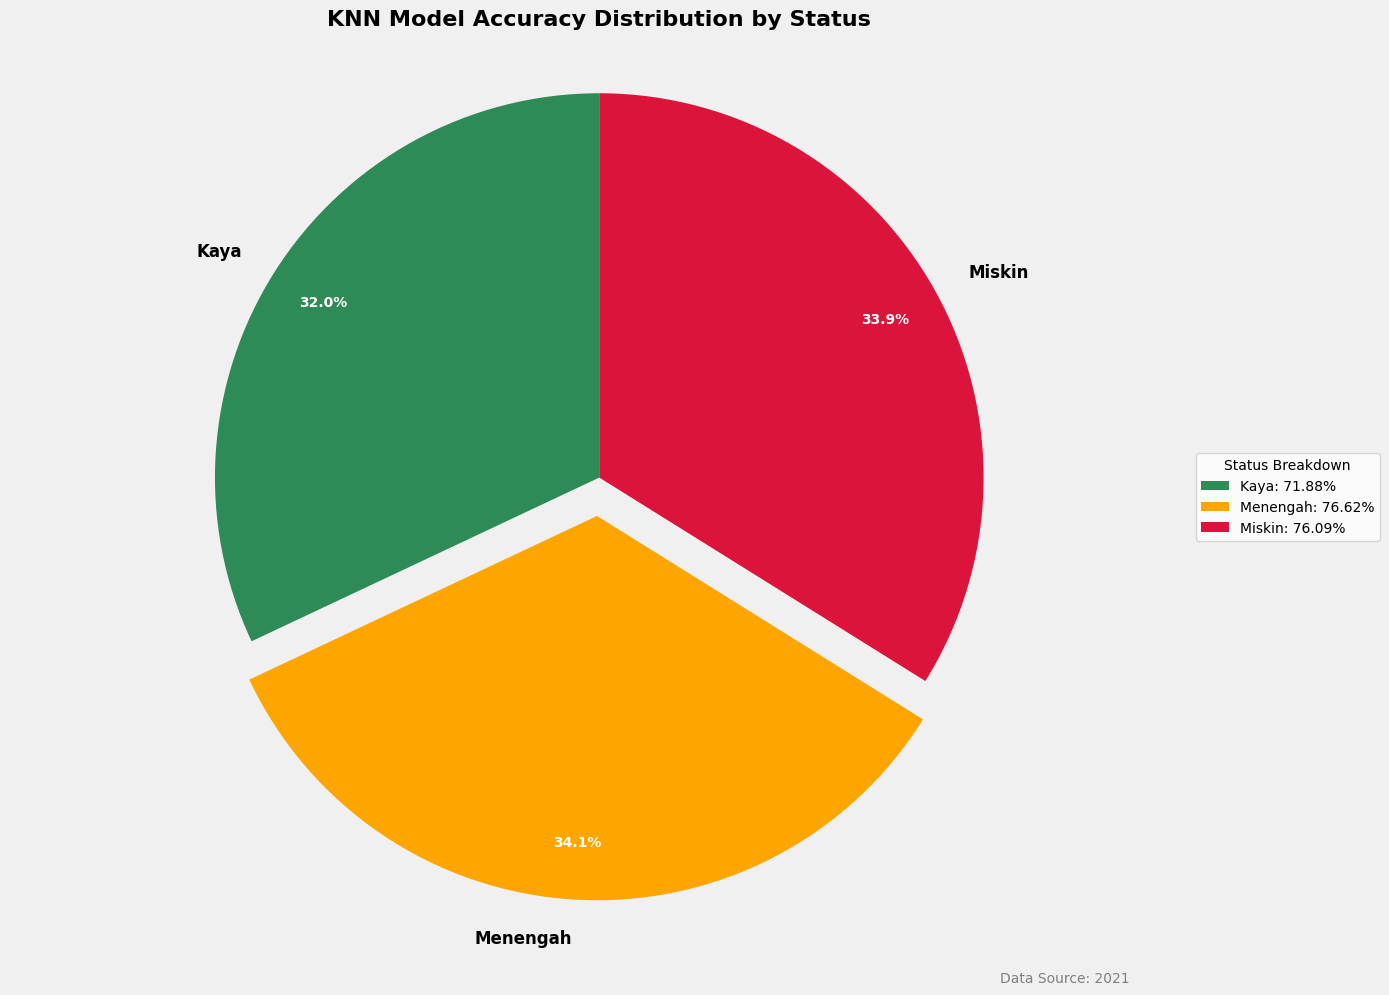

Evaluation results saved to 'knn_evaluation_results.csv'.


In [ ]:
def load_and_preprocess_data(file_path):

    dataset = pd.read_csv(file_path, sep=';')

    dataset['poorpeople_percentage'] = dataset['poorpeople_percentage'].str.replace(',', '.').astype(float)
    dataset['reg_gdp'] = dataset['reg_gdp'].str.replace(',', '.').astype(float)

    dataset.dropna(inplace=True)

    X = dataset[['poor_label', 'reg_gdp', 'exp_percap', 'total_label']]
    y = dataset['status']

    return X, y, dataset

def train_and_evaluate_knn(X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    knn_model = KNeighborsClassifier()
    knn_model.fit(X_train, y_train)

    y_pred = knn_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    conf_matrix = confusion_matrix(y_test, y_pred)

    cross_val_scores = cross_val_score(knn_model, X, y, cv=5, scoring='accuracy')

    status_labels = np.unique(y_test)
    status_accuracy = {}
    for status in status_labels:
        idx = np.where(status_labels == status)[0][0]
        true_positive = conf_matrix[idx, idx]
        total_status = np.sum(conf_matrix[:, idx])
        accuracy_per_status = true_positive / total_status if total_status > 0 else 0
        status_accuracy[status] = accuracy_per_status * 100

    return {
        'overall_accuracy': accuracy,
        'classification_report': classification_report(y_test, y_pred),
        'confusion_matrix': conf_matrix,
        'cross_val_scores': cross_val_scores,
        'status_accuracy': status_accuracy,
        'y_test': y_test,
        'y_pred': y_pred
    }

def create_status_accuracy_pie_chart(status_accuracy):

    labels = list(status_accuracy.keys())
    sizes = list(status_accuracy.values())

    colors = [
        '#2E8B57',
        '#FFA500',
        '#DC143C'
    ]

    explode = [0.1 if size == max(sizes) else 0 for size in sizes]

    plt.figure(figsize=(14, 10), facecolor='#F0F0F0')

    wedges, texts, autotexts = plt.pie(
        sizes,
        explode=explode,
        labels=labels,
        colors=colors,
        autopct='%1.1f%%',
        startangle=90,
        textprops={'fontsize': 12, 'fontweight': 'bold'},
        pctdistance=0.85
    )

    plt.setp(autotexts, size=10, weight="bold", color="white")

    plt.title(
        'KNN Model Accuracy Distribution by Status',
        fontsize=16,
        fontweight='bold',
        pad=20
    )

    legend_labels = [
        f"{label}: {size:.2f}%"
        for label, size in zip(labels, sizes)
    ]

    plt.legend(
        wedges,
        legend_labels,
        title="Status Breakdown",
        loc="center left",
        bbox_to_anchor=(1, 0.5),
        fontsize=10
    )

    plt.annotate(
        'Data Source: 2021',
        xy=(0.95, -0.05),
        xycoords='axes fraction',
        ha='right',
        va='bottom',
        fontsize=10,
        color='gray'
    )

    plt.axis('equal')
    plt.grid(False)
    plt.tight_layout()

    plt.show()
    plt.close()

def save_evaluation_results(evaluation_results, output_file='knn_evaluation_results.csv'):
    evaluation_df = pd.DataFrame({
        'True Labels': evaluation_results['y_test'],
        'Predicted Labels': evaluation_results['y_pred']
    })
    evaluation_df['Accuracy'] = evaluation_results['overall_accuracy']
    evaluation_df.to_csv(output_file, index=False)
    print(f"Evaluation results saved to '{output_file}'.")

def main():

    file_path = 'dataset.csv'

    X, y, dataset = load_and_preprocess_data(file_path)

    evaluation_results = train_and_evaluate_knn(X, y)

    print('=' * 50)
    print('KNN MODEL EVALUATION RESULTS')
    print('=' * 50)

    print(f'\n1. Overall KNN Model Accuracy: {evaluation_results["overall_accuracy"] * 100:.2f}%')

    print("\n2. Classification Report:")
    print(evaluation_results['classification_report'])

    print('\n3. Confusion Matrix:')
    print(evaluation_results['confusion_matrix'])

    print("\n4. Cross-Validation Accuracy Scores:", evaluation_results['cross_val_scores'])
    print("   Mean Cross-Validation Accuracy:", np.mean(evaluation_results['cross_val_scores']) * 100)

    print("\n5. Generating Status Accuracy Pie Chart...")
    create_status_accuracy_pie_chart(evaluation_results['status_accuracy'])

    save_evaluation_results(evaluation_results)

main()